In [49]:
import model
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(13)
np.random.seed(100)

In [50]:
bs = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1)
numeric = model.Numerical(100, 100, 0.3, 0.05, 0.01, 1)

In [51]:
# independent variable on x axis
spot = np.linspace(1, 200, 200)
time = np.linspace(0.01, 5, 200)
volatility = np.linspace(0.001, 10, 200)
risk_free = np.linspace(0.001, 1, 200)

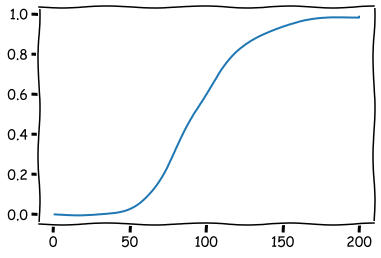

In [52]:
delta = [bs._delta() for bs.spot0 in spot]
plt.plot(spot, delta)
plt.show()

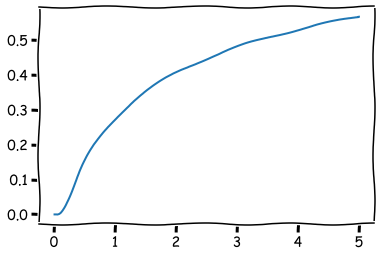

In [53]:
in_the_money = model.BlackScholes(100, 130, 0.3, 0.05, 0.01, 1)
delta = [in_the_money._delta() for in_the_money.T in time]
plt.plot(time, delta)
plt.show()

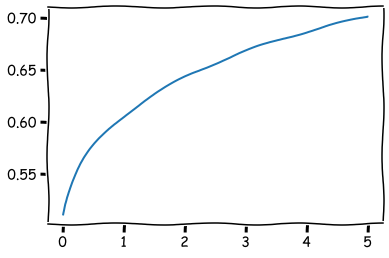

In [54]:
at_the_money = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1)
delta = [at_the_money._delta() for at_the_money.T in time]
plt.plot(time, delta)
plt.show()

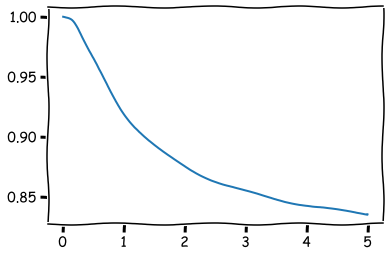

In [55]:
out_the_money = model.BlackScholes(100, 70, 0.3, 0.05, 0.01, 1)
delta = [out_the_money._delta() for out_the_money.T in time]
plt.plot(time, delta)
plt.show()

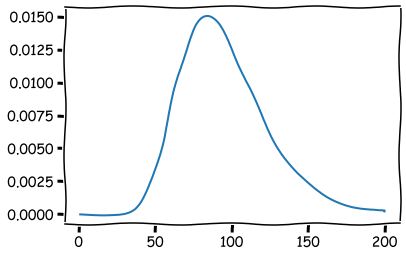

In [56]:
gamma = [bs._gamma() for bs.spot0 in spot]
plt.plot(spot, gamma)
plt.show()

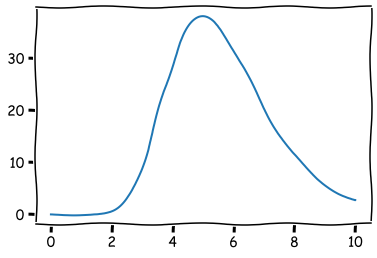

In [65]:
vega_vol = [bs._vega() for bs.sigma in volatility]
vega_spot = [bs._vega() for bs.spot0 in spot]
vega_time = [bs._vega() for bs.T in time]

plt.plot(volatility, vega_spot)
plt.show()

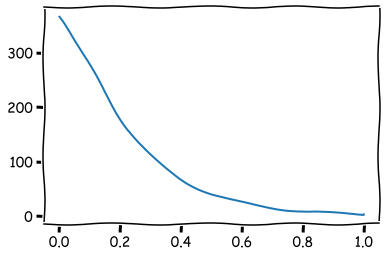

In [58]:
rho = [bs._rho() for bs.r in risk_free]
plt.plot(risk_free, rho)
plt.show()

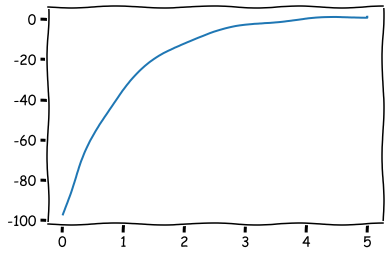

In [59]:
theta = [bs._theta() for bs.T in time]
plt.plot(time, theta)
plt.show()

In [60]:
bs._print()

---------------------------------------------
---------------------------------------------
Parameters of Option Pricer:
---------------------------------------------
Underlying Asset Price =  200.0
Strike Price =  100
Volatility =  0.3
Risk-Free Rate =  1.0
Dividend Rate =  0.01
Time to Maturity (years) =  5.0
---------------------------------------------
---------------------------------------------


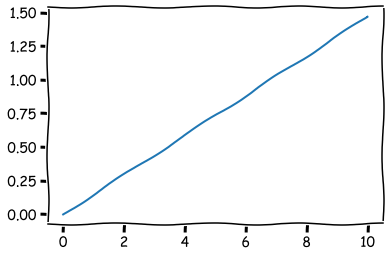

In [67]:
# how does the Black-Scholes price of a call option vary as a function of volatility
bs = model.BlackScholes(50, 50, 0.3, 0.05, 0.01, 1)
vanilla_price = [bs.vanilla_price() for bs.sigma in volatility]
price_to_volatility =  volatility / vanilla_price
plt.plot(volatility, price_to_volatility)
plt.show()

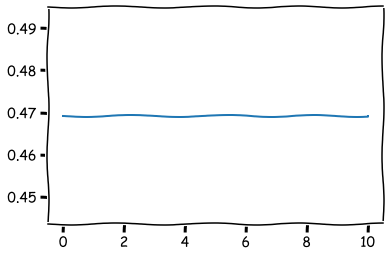

In [70]:
# same for digital call option
bs = model.BlackScholes(100,100, 0.3, 0.05, 0.01, 1)
digital_price = [bs.digital_price() for bs.sigma in volatility]
plt.plot(volatility, digital_price)
plt.show()

Text(16, 0.00244076324130171, '(16, 0.00244076324130171)')

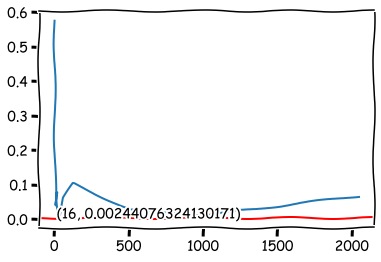

In [71]:
# stepping method error
exact_price = model.BlackScholes(100, 100, 0.10, 0.05, 0., 1).vanilla_price()
numeric = model.Numerical(100, 100, 0.10, 0.05, 0., 1)
steps = [2**n for n in range(1,12)]
numeric.M = 100
simulated_price = np.array([numeric.payoff(numeric.EM()) for numeric.N in steps])
error = abs(exact_price - simulated_price)/exact_price
xy=(2**np.argmin(error), np.min(error))
plt.plot(steps, error)
plt.axhline(min(error), color='r')
plt.annotate('(%s, %s)' %xy, xy=xy)

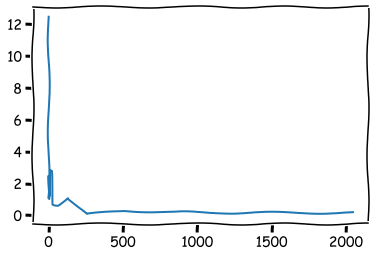

In [79]:
# monte carlo error
numeric = model.Numerical(100, 100, 0.10, 0.05, 0.01, 1)
paths = [2**n for n in range(12)]
simulated_price = np.array([numeric.payoff(numeric.GBM()) for numeric.M in paths])
error = abs(exact_price - simulated_price)#/exact_price
plt.plot(paths, error)
plt.show()

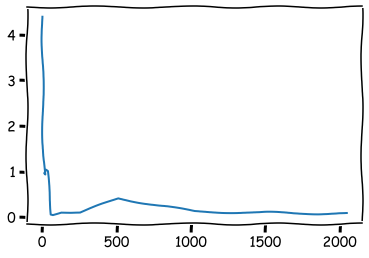

In [75]:
exact_price = model.BlackScholes(100, 100, 0.10, 0.05, 0.01, 1).vanilla_price()
numeric = model.Numerical(100, 100, 0.10, 0.05, 0.01, 1)
paths = [2**n for n in range(1,12)]
simulated_price = np.array([numeric.payoff(numeric.EM()) for numeric.M in paths])
error = abs(exact_price - simulated_price)#/exact_price
plt.plot(paths, error)
plt.show()

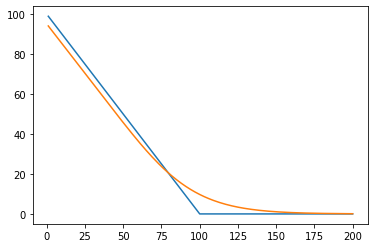

In [ ]:
bs = model.BlackScholes(100, 100, 0.3, 0.05, 0.01, 1, opt_type='put')
intrinsic_value = [max(bs.strike - s0, 0) for s0 in spot]
put_price = [bs.vanilla_price() for bs.spot0 in spot]
plt.plot(spot, intrinsic_value)
plt.plot(spot, put_price)
plt.show()

In [ ]:
# XKCD PLOTS
plt.xkcd()
rcParams = plt.rcParams
font_size = 14
rcParams['font.size'] = font_size
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size
rcParams['legend.fontsize'] = font_size

def pltXKCD(ax, x, y):
    
    #sns.despine(offset=10)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    #ax.set_xlim(30, 150)
    #ax.set_ylim(-20, 150)
    ax.set_ylabel("payoff")
    
    ax.plot(x, y)

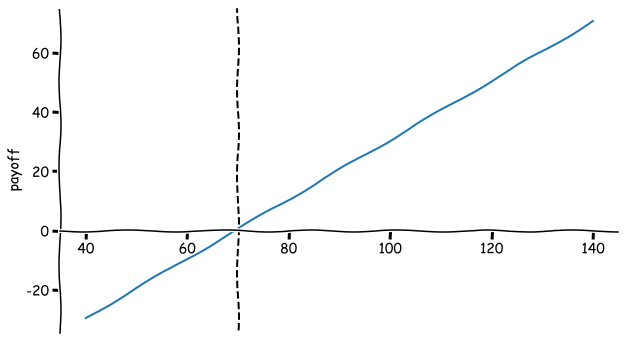

In [ ]:
# payoff of forward
premium = 10
bs = model.BlackScholes(60, 70, 0.3, 0.05, 0.01, 1, opt_type='call')
spotT = np.linspace(40, 140, 100)
payoff = [s0 - bs.forward() - premium for s0 in spotT]
fig, ax = plt.subplots(figsize=(10,6))
pltXKCD(ax, spotT, payoff)
#ax.set_yticks([-10, 0, 60])
#ax.set_yticklabels(['loss', '0', 'profit'])
#ax.set_xticks([35,70, 140])
#ax.set_xticklabels([35,70, 140])
ax.axvline(70, -1, 2, linestyle='--', color='k')


plt.show()

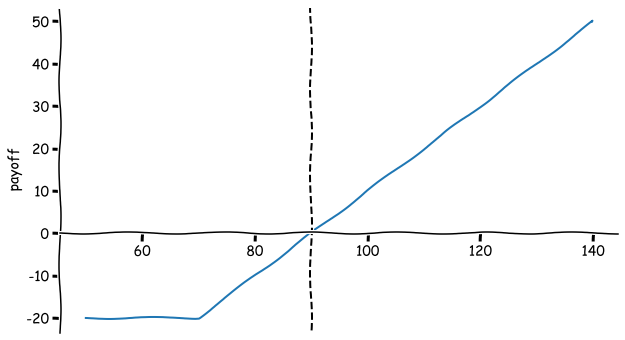

In [ ]:
## payoff of call option 
premium = 20
bs = model.BlackScholes(60, 70, 0.3, 0.05, 0.01, 1, opt_type='call')
spotT = np.linspace(50, 140, 140)
intrinsic_value = np.array([max(s0 - bs.strike, 0) for s0 in spotT])
call_price = np.array([bs.vanilla_price() for bs.spot0 in spotT])

fig, ax = plt.subplots(figsize=(10,6))

#pltXKCD(ax, spotT, call_price - premium)
pltXKCD(ax, spotT, intrinsic_value - premium)

#ax.set_yticks([-20, 0, 40])
#ax.set_yticklabels(['loss', '0', 'profit'])
#ax.set_xticks([90, 140])
#ax.set_xticklabels([90, 140])
ax.axvline(90, -1, 2, linestyle='--', color='k')

plt.show()

---